In [ ]:
!pip install datasets
!pip install torchvision
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.7/536.7 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.4/840.4 kB 9.7 MB/s eta 0:00:00


In [ ]:
import torch
import matplotlib.pyplot as plt
from datasets import load_dataset
import numpy as np
import torchvision
import torch.nn as nn
import torchmetrics

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
tiny_imagenet = load_dataset('Maysee/tiny-imagenet', split='train')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/100000 [00:00<?, ? examples/s]

Generating valid split:   0%|          | 0/10000 [00:00<?, ? examples/s]

In [ ]:
tiny_imagenet

Dataset({
    features: ['image', 'label'],
    num_rows: 100000
})

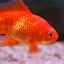

In [ ]:

# num=np.random.randint(0,10000)
tiny_imagenet[100]['image']

In [ ]:
# num_rows = tiny_imagenet.num_rows
num_rows=7500
images = []

for row in range(num_rows):
    image_pil = tiny_imagenet[row]['image']

    image_array = np.array(image_pil)

    images.append(image_array)

In [ ]:
len(images)

7500

In [ ]:
y=np.array(tiny_imagenet['label'])
np.unique(y)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [ ]:
y.shape

(100000,)

In [ ]:
X=[]
label=[]
for i in range(0,len(images)):
  if images[i].shape==(64, 64, 3):
    X.append(images[i])
    label.append(y[i])


X=np.array(X)
label=np.array(label)

In [ ]:
X.shape,label.shape

((7466, 64, 64, 3), (7466,))

In [ ]:
#converting to tenosrs
X=torch.FloatTensor(X)
label=torch.LongTensor(label)

In [ ]:
X.shape,label.shape

(torch.Size([7466, 64, 64, 3]), torch.Size([7466]))

In [ ]:
import torch.nn as nn
num_classes=200
classifier=nn.Sequential(
    nn.Linear(1000,512),
    nn.ReLU(),
    nn.Linear(512,num_classes),
    nn.Softmax(dim=1)
)

class custom_model(nn.Module):
  def __init__(self,model,classifier):
    super().__init__()
    self.m1=model
    self.m2=classifier
  def forward(self,x):
    x=self.m1(x).logits
    x=self.m2(x)

    return x



In [ ]:
new_model=torch.load("/content/drive/MyDrive/ED Lab/finetuned_model.pt")

In [ ]:
print(new_model)

custom_model(
  (m1): ResNetForImageClassification(
    (resnet): ResNetModel(
      (embedder): ResNetEmbeddings(
        (embedder): ResNetConvLayer(
          (convolution): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
          (normalization): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (activation): ReLU()
        )
        (pooler): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      )
      (encoder): ResNetEncoder(
        (stages): ModuleList(
          (0): ResNetStage(
            (layers): Sequential(
              (0): ResNetBasicLayer(
                (shortcut): Identity()
                (layer): Sequential(
                  (0): ResNetConvLayer(
                    (convolution): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
                    (normalization): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_st

In [ ]:
for param in new_model.m1.parameters():
    param.requires_grad = False

for param in new_model.m2.parameters():
    param.requires_grad = True

In [ ]:
tt_p=sum(p.numel() for p in new_model.parameters() if p.requires_grad)
t_p=sum(p.numel() for p in new_model.parameters())
print(f'Total number of parameters:{t_p}, Total number of trainable parameters:{tt_p}')

Total number of parameters:12304624, Total number of trainable parameters:615112


In [ ]:
parameter_names = [(name, 'weight') for name, module in new_model.named_modules() if isinstance(module, torch.nn.Conv2d) or isinstance(module, torch.nn.Linear)]

In [ ]:
parameter_names

[('m1.resnet.embedder.embedder.convolution', 'weight'),
 ('m1.resnet.encoder.stages.0.layers.0.layer.0.convolution', 'weight'),
 ('m1.resnet.encoder.stages.0.layers.0.layer.1.convolution', 'weight'),
 ('m1.resnet.encoder.stages.0.layers.1.layer.0.convolution', 'weight'),
 ('m1.resnet.encoder.stages.0.layers.1.layer.1.convolution', 'weight'),
 ('m1.resnet.encoder.stages.1.layers.0.shortcut.convolution', 'weight'),
 ('m1.resnet.encoder.stages.1.layers.0.layer.0.convolution', 'weight'),
 ('m1.resnet.encoder.stages.1.layers.0.layer.1.convolution', 'weight'),
 ('m1.resnet.encoder.stages.1.layers.1.layer.0.convolution', 'weight'),
 ('m1.resnet.encoder.stages.1.layers.1.layer.1.convolution', 'weight'),
 ('m1.resnet.encoder.stages.2.layers.0.shortcut.convolution', 'weight'),
 ('m1.resnet.encoder.stages.2.layers.0.layer.0.convolution', 'weight'),
 ('m1.resnet.encoder.stages.2.layers.0.layer.1.convolution', 'weight'),
 ('m1.resnet.encoder.stages.2.layers.1.layer.0.convolution', 'weight'),
 ('m1.

In [ ]:
parameters_to_prune = []
for name, value in parameter_names:
    module_path = name.split('.')
    module = new_model
    for attr in module_path:
        module = getattr(module, attr)


    parameters_to_prune.append((module, value))

In [ ]:
parameters_to_prune

[(Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False),
  'weight'),
 (Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False),
  'weight'),
 (Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False),
  'weight'),
 (Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False),
  'weight'),
 (Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False),
  'weight'),
 (Conv2d(64, 128, kernel_size=(1, 1), stride=(2, 2), bias=False), 'weight'),
 (Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False),
  'weight'),
 (Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False),
  'weight'),
 (Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False),
  'weight'),
 (Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False),
  'weight'),
 (Conv2d(128, 256, kernel_size=(1, 1), stride=(2, 2), bias=False), 'wei

In [ ]:
import torch.nn.utils.prune as prune

'''
Global Structured Pruning
'''
def global_structured_pruning(amount):
  for module, param in parameters_to_prune:
      prune.ln_structured(module, name=param, amount=amount, n=float('-inf'), dim=1)

'''
Global Unstructured Pruning
'''
def global_unstructured_pruning(amount):

  prune.global_unstructured(
      parameters_to_prune,
      pruning_method=prune.L1Unstructured,
      amount=amount,
      importance_scores=None
  )

In [ ]:
# for name, module in new_model.named_modules():
#     if isinstance(module, torch.nn.Conv2d) or isinstance(module, torch.nn.Linear):
#         # Check if the layer's weights have been pruned
#         if hasattr(module, 'weight_orig'):
#             print(f"Parameters of {name} have been pruned.")
#         else:
#             print(f"Parameters of {name} have not been pruned.")

In [ ]:
perm_indices = torch.randperm(X.size(0))
X = X[perm_indices]
label = label[perm_indices]

In [ ]:
X.shape

torch.Size([7466, 64, 64, 3])

In [ ]:
from transformers import AutoFeatureExtractor, ResNetForImageClassification

feature_extractor = AutoFeatureExtractor.from_pretrained("microsoft/resnet-18")

# X=X[:10000]
# label=label[:10000]
X_features=[]
# count=0
for img in X:
  # count=count+1
  # print(count)
  temp= feature_extractor(img, return_tensors="pt").pixel_values
  temp=torch.squeeze(temp)
  # print(temp.shape)
  X_features.append(temp)
X_features=torch.stack(X_features)

preprocessor_config.json:   0%|          | 0.00/266 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/convnext/feature_extraction_convnext.py:28: FutureWarning: The class ConvNextFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ConvNextImageProcessor instead.
  warnings.warn(


In [ ]:
X_features=X_features.to('cuda')
label=label.to('cuda')
new_model=new_model.to('cuda')


In [ ]:
X_features.shape,label.shape

(torch.Size([7466, 3, 224, 224]), torch.Size([7466]))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_features, label, test_size=0.01)

In [ ]:
X_train.shape,X_val.shape

(torch.Size([7391, 3, 224, 224]), torch.Size([75, 3, 224, 224]))

In [ ]:
from torch.utils.data import TensorDataset, DataLoader
train_dataset=TensorDataset(X_train,y_train)
val_dataset=TensorDataset(X_val,y_val)

In [ ]:
val_dataloader = DataLoader(val_dataset, batch_size=64, shuffle=True)
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)

In [ ]:
len(train_dataloader)

116

In [ ]:
len(val_dataloader)

2

## Global Unstructured Pruning

In [ ]:
epochs=5

n_times=2

criterion=nn.CrossEntropyLoss()
opt=torch.optim.Adam(new_model.parameters(), lr=0.0001)
accuracy = torchmetrics.Accuracy(task="multiclass", num_classes=200).to('cuda')

for t in range(n_times):
  print(f"Pruning loop no.- {t+1}")
  global_unstructured_pruning(0.01)
  for epoch in range(epochs):
    avg_train_acc=0
    avg_val_acc=0

    avg_train_loss=0
    avg_val_loss=0
    for batch in train_dataloader:

      X_batch, label_batch = batch
      # print(X_batch.shape)
      preds=new_model(X_batch)

      loss=criterion(preds,label_batch)
      acc=accuracy(preds,label_batch)
      avg_train_acc=avg_train_acc+acc
      avg_train_loss=avg_train_loss+loss

      opt.zero_grad()
      loss.backward()
      opt.step()


    with torch.no_grad():
      for batch in val_dataloader:
        X_val_batch, label_val_batch = batch


        val_preds=new_model(X_val_batch)
        val_loss=criterion(val_preds,label_val_batch)
        val_acc=accuracy(val_preds,label_val_batch)
        avg_val_acc=avg_val_acc+val_acc
        avg_val_loss=avg_val_loss+val_loss



    # print(f'Epoch {epoch}: Training Loss:  Training accuracy: , Validation Loss: Validation accuracy:')
    # if epoch%5==0:
    print(f"| Epoch={epoch+1} | Training Accuracy={avg_train_acc/len(train_dataloader)} | Validation Accuracy={avg_val_acc/len(val_dataloader)} | Training Loss={avg_train_loss/len(train_dataloader)} | Validation_Loss={avg_val_loss/len(val_dataloader)} |")
    print('---------------------------------------------------------------------------------------------------------------------')


new_model=new_model.to('cpu')
torch.save(new_model,'/content/drive/MyDrive/ED Lab/unstructured_pruned_test_model.pt')


Pruning loop no.- 1
| Epoch=1 | Training Accuracy=0.8051828145980835 | Validation Accuracy=0.8764204978942871 | Training Loss=4.512418746948242 | Validation_Loss=4.434830665588379 |
---------------------------------------------------------------------------------------------------------------------
| Epoch=2 | Training Accuracy=0.8175925016403198 | Validation Accuracy=0.8309658765792847 | Training Loss=4.500675201416016 | Validation_Loss=4.4851226806640625 |
---------------------------------------------------------------------------------------------------------------------
| Epoch=3 | Training Accuracy=0.8323831558227539 | Validation Accuracy=0.8607954978942871 | Training Loss=4.4876556396484375 | Validation_Loss=4.449413299560547 |
---------------------------------------------------------------------------------------------------------------------
| Epoch=4 | Training Accuracy=0.839530885219574 | Validation Accuracy=0.8465908765792847 | Training Loss=4.4791412353515625 | Validation_L

## Global Structured Pruning

In [ ]:
new_model=torch.load("/content/drive/MyDrive/ED Lab/finetuned_model.pt")
new_model=new_model.to("cuda")

In [ ]:
epochs=5

n_times=2

criterion=nn.CrossEntropyLoss()
opt=torch.optim.Adam(new_model.parameters(), lr=0.0001)
accuracy = torchmetrics.Accuracy(task="multiclass", num_classes=200).to('cuda')

for t in range(n_times):
  print(f"Pruning loop no.- {t+1}")
  global_structured_pruning(0.01)
  for epoch in range(epochs):
    avg_train_acc=0
    avg_val_acc=0

    avg_train_loss=0
    avg_val_loss=0
    for batch in train_dataloader:

      X_batch, label_batch = batch
      # print(X_batch.shape)
      preds=new_model(X_batch)

      loss=criterion(preds,label_batch)
      acc=accuracy(preds,label_batch)
      avg_train_acc=avg_train_acc+acc
      avg_train_loss=avg_train_loss+loss

      opt.zero_grad()
      loss.backward()
      opt.step()


    with torch.no_grad():
      for batch in val_dataloader:
        X_val_batch, label_val_batch = batch


        val_preds=new_model(X_val_batch)
        val_loss=criterion(val_preds,label_val_batch)
        val_acc=accuracy(val_preds,label_val_batch)
        avg_val_acc=avg_val_acc+val_acc
        avg_val_loss=avg_val_loss+val_loss



    # print(f'Epoch {epoch}: Training Loss:  Training accuracy: , Validation Loss: Validation accuracy:')
    # if epoch%5==0:
    print(f"| Epoch={epoch+1} | Training Accuracy={avg_train_acc/len(train_dataloader)} | Validation Accuracy={avg_val_acc/len(val_dataloader)} | Training Loss={avg_train_loss/len(train_dataloader)} | Validation_Loss={avg_val_loss/len(val_dataloader)} |")
    print('---------------------------------------------------------------------------------------------------------------------')


new_model=new_model.to('cpu')
torch.save(new_model,'/content/drive/MyDrive/ED Lab/structured_pruned_test_model.pt')


Pruning loop no.- 1
| Epoch=1 | Training Accuracy=0.7234209775924683 | Validation Accuracy=0.6867897510528564 | Training Loss=4.5927228927612305 | Validation_Loss=4.629110336303711 |
---------------------------------------------------------------------------------------------------------------------
| Epoch=2 | Training Accuracy=0.7460155487060547 | Validation Accuracy=0.8075283765792847 | Training Loss=4.572872638702393 | Validation_Loss=4.5356340408325195 |
---------------------------------------------------------------------------------------------------------------------
| Epoch=3 | Training Accuracy=0.7675411701202393 | Validation Accuracy=0.7166193127632141 | Training Loss=4.55439567565918 | Validation_Loss=4.598766326904297 |
---------------------------------------------------------------------------------------------------------------------
| Epoch=4 | Training Accuracy=0.7841699123382568 | Validation Accuracy=0.7997158765792847 | Training Loss=4.537580966949463 | Validation_Lo

# Comparing Results

In [ ]:
!pip install fvcore
!pip install thop

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 427.9 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fvcore: filename=fvcore-0.1.5.post20221221-py3-none-any.whl size=61400 sha256=a8225c999c2469a832238d9aff01637dcf9aaad9f306017b2b0527d68e55334e
  Stored in directory: /root/.cache/pip/wheels/01/c0/af/77c1cf53a1be9e42a52b48e5af2169d40ec2e89f7362489dd0
  Created wheel for iopath: filename=iopath-0.1.10-py3-none-any.whl size=31532 sha256=729a45bfd4a92cff12f52dc39bbdd8a8b39c51a3e0012748e56bec37852ef630
  Stored in directory: /root/.cache/pip/wheels/9a/a3/b6/ac0fcd1b4ed5cfeb3db92e6a0e476cfd48ed0df92b91080c1d
Successfully built fvcore iopath


In [ ]:
## Load model and calculate flops
pretrained_raw=torch.load('/content/drive/MyDrive/ED Lab/finetuned_model.pt')
pretrained_raw=pretrained_raw.to('cuda')

pruned_model=torch.load('/content/drive/MyDrive/ED Lab/unstructured_pruned_test_model.pt')
pruned_model=pruned_model.to("cuda")

pruned_model_structured=torch.load('/content/drive/MyDrive/ED Lab/structured_pruned_test_model.pt')
pruned_model_structured=pruned_model_structured.to("cuda")

## Before Pruning

In [ ]:
import torch.profiler
# new_model=new_model.to("cuda")

input_size = (1, 3, 64, 64)


input_data = torch.randn(input_size)
input_data = input_data.cuda()


with torch.no_grad():
    _ = pretrained_raw(input_data)


with torch.profiler.profile(profile_memory=True, record_shapes=True) as prof:
    with torch.profiler.record_function("model_inference"):
        _ = pretrained_raw(input_data)

print(prof.key_averages().table(sort_by="cpu_time_total"))



-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                                   Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg     Self CUDA   Self CUDA %    CUDA total  CUDA time avg       CPU Mem  Self CPU Mem      CUDA Mem  Self CUDA Mem    # of Calls  
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                        model_inference        26.36%       8.593ms        99.94%      32.577ms      32.577ms       0.000us         0.00%       4.044ms       4.044ms           0 b           0 b       7.00 Kb      -2.46 M

## After Pruning (Global Unstructured)

In [ ]:
import torch.profiler
# new_model=new_model.to("cuda")

input_size = (1, 3, 64, 64)


input_data = torch.randn(input_size)
input_data = input_data.cuda()


with torch.no_grad():
    _ = pruned_model(input_data)


with torch.profiler.profile(profile_memory=True, record_shapes=True) as prof:
    with torch.profiler.record_function("model_inference"):
        _ = pruned_model(input_data)

print(prof.key_averages().table(sort_by="cpu_time_total"))



-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                                   Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg     Self CUDA   Self CUDA %    CUDA total  CUDA time avg       CPU Mem  Self CPU Mem      CUDA Mem  Self CUDA Mem    # of Calls  
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                        model_inference        65.93%      17.574ms        99.92%      26.634ms      26.634ms       0.000us         0.00%       4.191ms       4.191ms           0 b           0 b       7.00 Kb     -50.40 M

## After Pruning (Global Structured)

In [ ]:
import torch.profiler
# new_model=new_model.to("cuda")

input_size = (1, 3, 64, 64)


input_data = torch.randn(input_size)
input_data = input_data.cuda()


with torch.no_grad():
    _ = pruned_model_structured(input_data)


with torch.profiler.profile(profile_memory=True, record_shapes=True) as prof:
    with torch.profiler.record_function("model_inference"):
        _ = pruned_model_structured(input_data)

print(prof.key_averages().table(sort_by="cpu_time_total"))



-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                                   Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg     Self CUDA   Self CUDA %    CUDA total  CUDA time avg       CPU Mem  Self CPU Mem      CUDA Mem  Self CUDA Mem    # of Calls  
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                        model_inference        36.31%       4.870ms        99.87%      13.395ms      13.395ms       0.000us         0.00%       4.196ms       4.196ms           0 b           0 b       1.51 Mb     -49.53 M